In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 222us/sample - loss: 0.4892 - accuracy: 0.8239 - val_loss: 0.4343 - val_accuracy: 0.8372
Epoch 2/10
48000/48000 [==============================] - 9s 186us/sample - loss: 0.3690 - accuracy: 0.8645 - val_loss: 0.3553 - val_accuracy: 0.8709
Epoch 3/10
48000/48000 [==============================] - 8s 168us/sample - loss: 0.3282 - accuracy: 0.8782 - val_loss: 0.3347 - val_accuracy: 0.8801
Epoch 4/10
48000/48000 [==============================] - 9s 178us/sample - loss: 0.3039 - accuracy: 0.8870 - val_loss: 0.3448 - val_accuracy: 0.8731
Epoch 5/10
48000/48000 [==============================] - 9s 188us/sample - loss: 0.2869 - accuracy: 0.8946 - val_loss: 0.3170 - val_accuracy: 0.8840
Epoch 6/10
48000/48000 [==============================] - 9s 188us/sample - loss: 0.2684 - accuracy: 0.8973 - val_loss: 0.3568 - val_accuracy: 0.8718
Epoch 7/10
48000/48000 [=========================

In [4]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

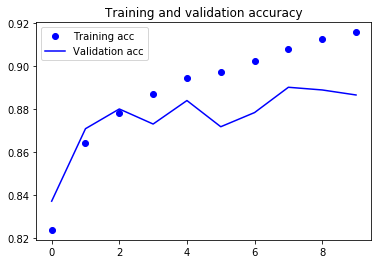

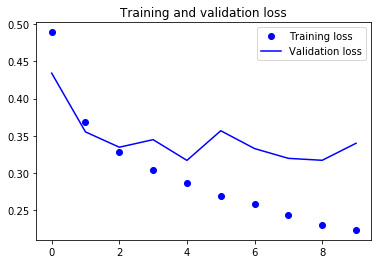

In [5]:
plot_history(history)

In [6]:
early_stopping = EarlyStopping(patience=2, monitor='val_loss')

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train, validation_split=0.2, epochs=10, 
                    callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 237us/sample - loss: 0.4839 - accuracy: 0.8228 - val_loss: 0.4012 - val_accuracy: 0.8528
Epoch 2/10
48000/48000 [==============================] - 13s 263us/sample - loss: 0.3629 - accuracy: 0.8668 - val_loss: 0.3580 - val_accuracy: 0.8702
Epoch 3/10
48000/48000 [==============================] - 9s 187us/sample - loss: 0.3265 - accuracy: 0.8789 - val_loss: 0.3371 - val_accuracy: 0.8783
Epoch 4/10
48000/48000 [==============================] - 10s 211us/sample - loss: 0.3015 - accuracy: 0.8859 - val_loss: 0.3118 - val_accuracy: 0.8888
Epoch 5/10
48000/48000 [==============================] - 9s 196us/sample - loss: 0.2847 - accuracy: 0.8931 - val_loss: 0.3606 - val_accuracy: 0.8727
Epoch 6/10
48000/48000 [==============================] - 12s 258us/sample - loss: 0.2685 - accuracy: 0.9001 - val_loss: 0.3322 - val_accuracy: 0.8837


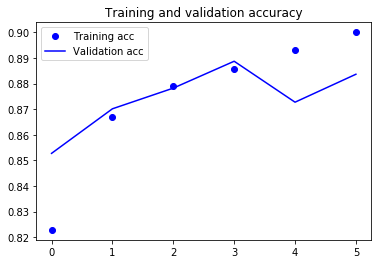

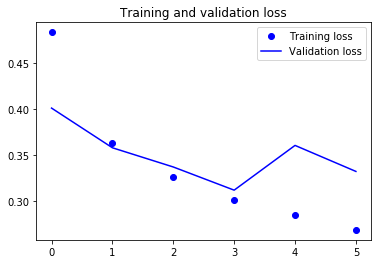

In [8]:
plot_history(history2)

In [9]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': 1500,
 'samples': 48000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}